In [1]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
gdf = gpd.read_file("data/districts/VG1000_KRS.shp")
gdf = gdf.astype({"AGS_0": "float"})
power_gen = pd.read_csv("data/districts/power_generation.csv")

<Axes: >

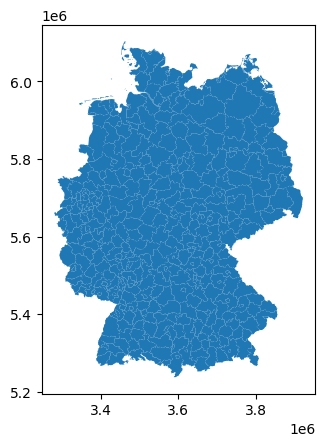

In [7]:
gdf.plot()

<Axes: >

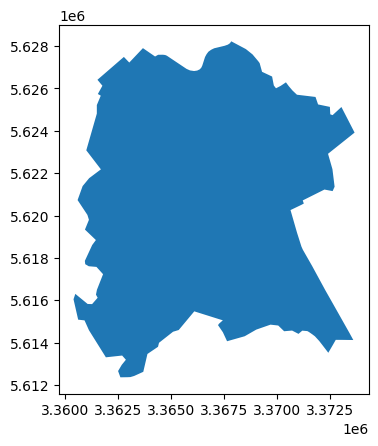

In [8]:
bonn = gdf[gdf["GEN"] == "Bonn"]
bonn.plot()

<Axes: >

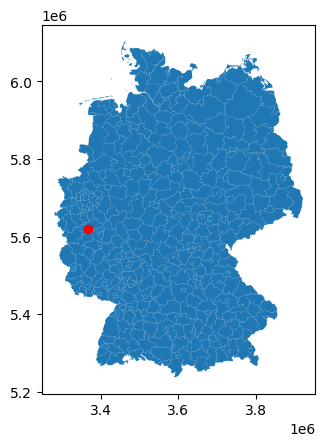

In [10]:
fig, ax = plt.subplots()
bonn = gdf[gdf["GEN"] == "Bonn"]
gdf.plot(ax=ax)
bonn.centroid.plot(ax=ax, color="red")

In [12]:
accumulated_power = power_gen.groupby(["district", "energyType"]).sum().reset_index()
accumulated_power_wind = accumulated_power[accumulated_power["energyType"] == "wind"]
merged = gdf.merge(accumulated_power_wind[["netRatePower", "district"]], left_on="AGS_0", right_on="district")
merged

,ADE,GF,BSG,ARS,AGS,SDV_ARS,GEN,BEZ,IBZ,BEM,NBD,SN_L,SN_R,SN_K,SN_V1,SN_V2,SN_G,FK_S3,NUTS,ARS_0,AGS_0,WSK,DEBKG_ID,geometry,netRatePower,district
0,4,4,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,40,--,ja,01,0,01,00,00,000,R,DEF01,010010000000,1001000.0,2008-01-01,DEBKGDL1000055UK,"POLYGON ((3527924.046 6075754.730, 3527955.026...",73310.0,1001000.0
1,4,2,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,40,--,ja,01,0,01,00,00,000,R,DEF01,010010000000,1001000.0,2008-01-01,DEBKGDL1000055V2,"POLYGON ((3531096.420 6078759.668, 3531713.338...",73310.0,1001000.0
2,4,4,1,01002,01002,010020000000,Kiel,Kreisfreie Stadt,40,--,ja,01,0,02,00,00,000,R,DEF02,010020000000,1002000.0,2006-01-01,DEBKGDL1000055TK,"POLYGON ((3577255.666 6031939.279, 3577509.282...",75.0,1002000.0
3,4,2,1,01002,01002,010020000000,Kiel,Kreisfreie Stadt,40,--,ja,01,0,02,00,00,000,R,DEF02,010020000000,1002000.0,2006-01-01,DEBKGDL1000055WQ,"MULTIPOLYGON (((3574883.505 6026437.417, 35749...",75.0,1002000.0
4,4,4,1,01003,01003,010030000000,Lübeck,Kreisfreie Stadt,40,--,ja,01,0,03,00,00,000,R,DEF03,010030000000,1003000.0,2006-02-01,DEBKGDL1000055W1,"POLYGON ((3623798.629 5982634.490, 3623806.046...",14650.0,1003000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,4,4,1,16073,16073,160730077077,Saalfeld-Rudolstadt,Landkreis,43,--,ja,16,0,73,00,00,000,R,DEG0I,160730000000,16073000.0,2019-01-01,DEBKGDL10000562F,"POLYGON ((3659812.437 5635203.417, 3660125.827...",9250.0,16073000.0
347,4,4,1,16074,16074,160745052018,Saale-Holzland-Kreis,Landkreis,43,--,nein,16,0,74,00,00,000,R,DEG0J,160740000000,16074000.0,2009-01-01,DEBKGDL10000562E,"POLYGON ((3689415.261 5662834.649, 3690126.219...",150843.0,16074000.0
348,4,4,1,16075,16075,160750098098,Saale-Orla-Kreis,Landkreis,43,--,nein,16,0,75,00,00,000,R,DEG0K,160750000000,16075000.0,2009-01-01,DEBKGDL1000055WF,"POLYGON ((3699614.947 5632057.830, 3699672.707...",55107.0,16075000.0
349,4,4,1,16076,16076,160760022022,Greiz,Landkreis,43,--,ja,16,0,76,00,00,000,R,DEG0L,160760000000,16076000.0,2009-01-01,DEBKGDL10000563K,"POLYGON ((3723569.241 5653847.355, 3724811.772...",74327.0,16076000.0


<Axes: >

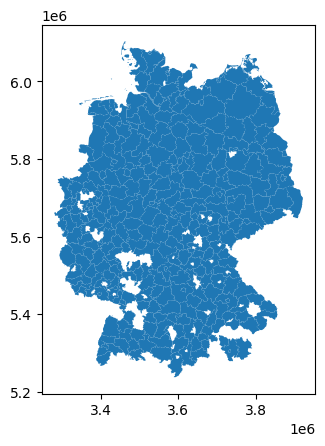

In [14]:
merged.plot()